# Assignment 1: Dimensionality Reduction using PCA

## Question 1

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# 1. Retrieve and load the mnist_784 dataset of 70,000 instances.
mnist = datasets.fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
print("Shape of MNIST dataset: ", mnist[0].shape)
df = pd.DataFrame(mnist[0])

Shape of MNIST dataset:  (70000, 784)


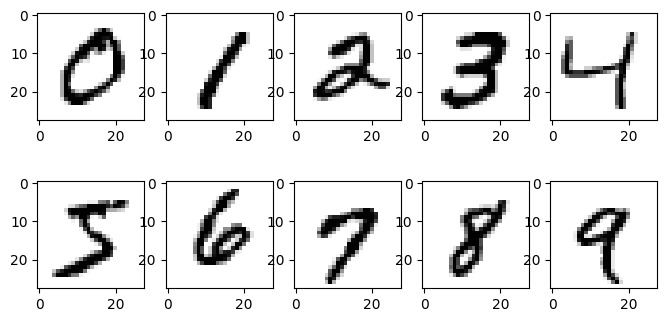

In [229]:
# 2. Display each digit
plt.figure(figsize=(8, 4))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    # First image representing digit i
    digit = df.loc[mnist[1] == str(i)].iloc[0]
    # Display image
    plt.imshow(digit.values.reshape(28, 28), cmap='binary')

In [247]:
# 3. Use PCA to retrieve the 1st and 2nd principal components and output their explained variance ratio
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(mnist[0])
print("Explained variance ratio of the 1st and 2nd principal components: ", pca.explained_variance_ratio_)

Explained variance ratio of the 1st and 2nd principal components:  [0.09746116 0.07155445]


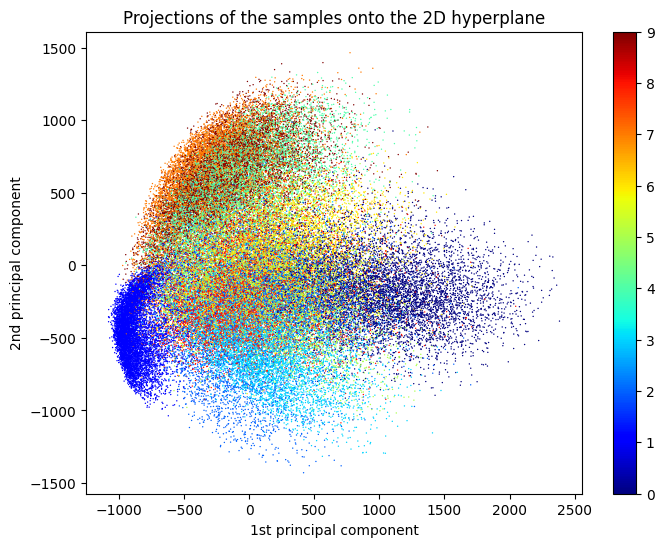

In [248]:
# 4. Plot the projections of the 1st and 2nd principal components onto a 2D hyperplane.
plt.figure(figsize=(8, 6))
plt.scatter(pca.transform(mnist[0])[:, 0], pca.transform(mnist[0])[:, 1],
            c=mnist[1].astype(int), edgecolor='none', s=1, cmap='jet')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Projections of the samples onto the 2D hyperplane')
plt.colorbar()
plt.show()

In [234]:
# 5. Use Incremental PCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions.
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=154)
ipca.fit(mnist[0].values)

IncrementalPCA(n_components=154)

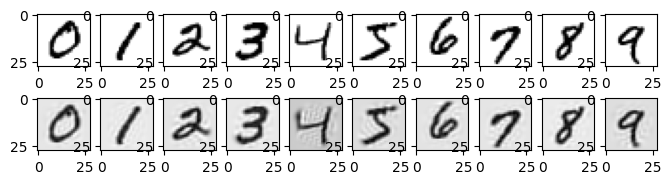

In [235]:
# 6. Display the original and compressed digits

plt.figure(figsize=(8, 2))
for i in range(0, 10):
    plt.subplot(2, 10, i+1)
    # First image representing digit i
    digit = df.loc[mnist[1] == str(i)].iloc[0]
    # Display image
    plt.imshow(digit.values.reshape(28, 28), cmap='binary')
    plt.subplot(2, 10, i+11)
    # First image representing digit i
    digit = ipca.inverse_transform(ipca.transform(digit.values.reshape(1, -1)))
    # Display image
    plt.imshow(digit.reshape(28, 28), cmap='binary')

In [236]:
# 7. TODO: Create a video discussing the code and result for each question.
# Discuss challenges you confronted and solutions to overcoming them, if applicable.

## Question 2

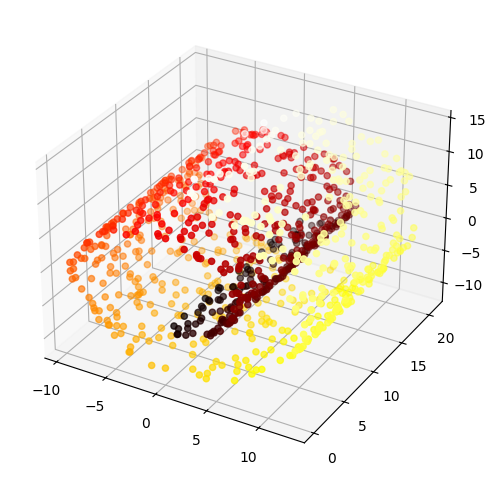

In [237]:
# 1. Generate Swiss roll dataset.
import numpy as np
from sklearn.datasets import make_swiss_roll

X_sw, y_sw = make_swiss_roll(n_samples=1000, noise=0.05, random_state=42)

# 2. Plot the resulting generated Swiss roll dataset.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_sw[:,0], X_sw[:,1], X_sw[:,2], c=y_sw, cmap='hot')
plt.show()

In [238]:
# 3. Use Kernel PCA(kPCA) with linear, rbf, and sigmoid kernels.
from sklearn.decomposition import KernelPCA

pca_lin = KernelPCA(n_components=2, kernel='linear', random_state=42)
pca_rbf = KernelPCA(n_components=2, kernel='rbf', random_state=42, gamma=0.1)
pca_sig = KernelPCA(n_components=2, kernel='sigmoid', random_state=42, gamma=0.0005)
pca_lin.fit(X_sw)
pca_rbf.fit(X_sw)
pca_sig.fit(X_sw)

KernelPCA(gamma=0.0005, kernel='sigmoid', n_components=2, random_state=42)

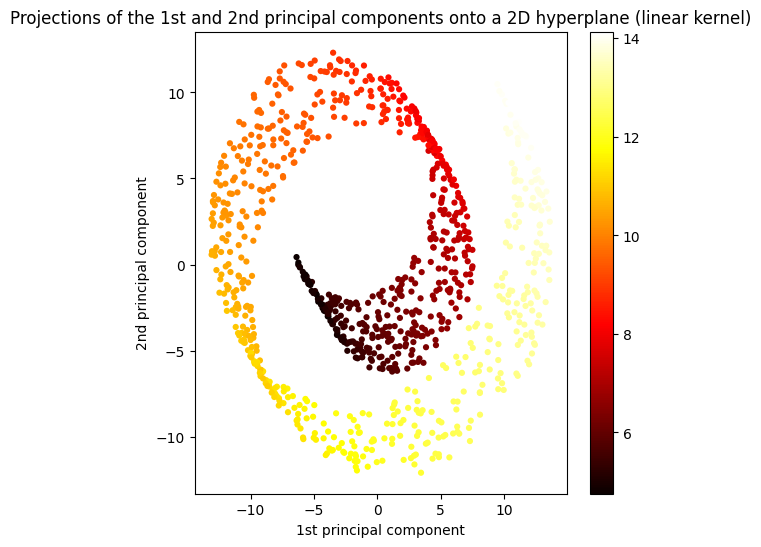

In [239]:
# 4. Plot the projections of the 1st and 2nd principal components onto a 2D hyperplane.

plt.figure(figsize=(6, 6))
plt.scatter(pca_lin.transform(X_sw)[:, 0], pca_lin.transform(X_sw)[:, 1],
            c=y_sw, edgecolor='none', s=20, cmap='hot')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Projections of the 1st and 2nd principal components onto a 2D hyperplane (linear kernel)')
plt.colorbar()
plt.show()

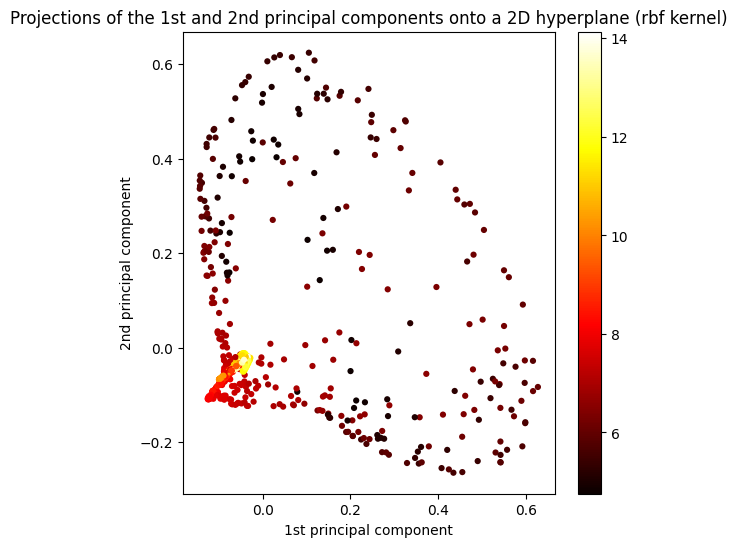

In [240]:
plt.figure(figsize=(6, 6))
plt.scatter(pca_rbf.transform(X_sw)[:, 0], pca_rbf.transform(X_sw)[:, 1],
            c=y_sw, edgecolor='none', s=20, cmap='hot')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Projections of the 1st and 2nd principal components onto a 2D hyperplane (rbf kernel)')
plt.colorbar()
plt.show()

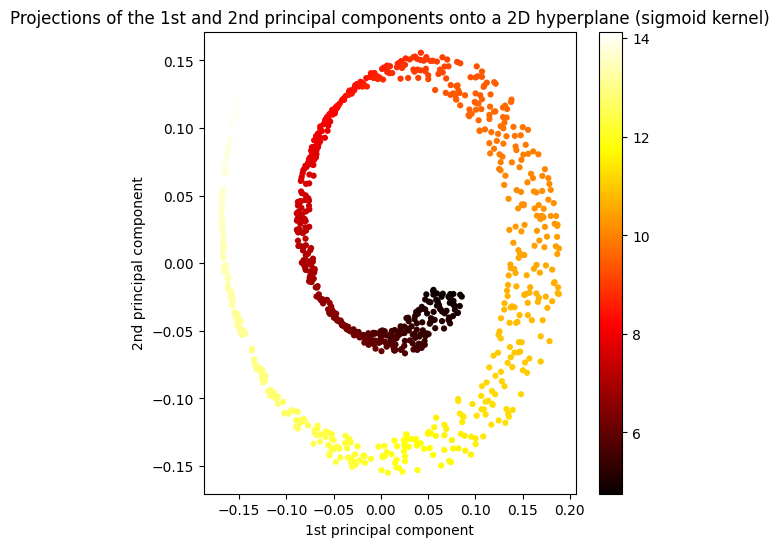

In [241]:
plt.figure(figsize=(6, 6))
plt.scatter(pca_sig.transform(X_sw)[:, 0], pca_sig.transform(X_sw)[:, 1],
            c=y_sw, edgecolor='none', s=20, cmap='hot')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Projections of the 1st and 2nd principal components onto a 2D hyperplane (sigmoid kernel)')
plt.colorbar()
plt.show()

In [242]:
# TODO: Explain and compare the results.

In [243]:
# 5. Using kPCA and a kernel of your choice, apply Logistic Regression for classification.
#    Use GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best
#    classification accuracy at the end of the pipeline. Print out best parameters found by GridSearchCV.
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

threshold = np.median(y_sw)
print("Threshold: ", threshold)
y_sw_binary = np.where(threshold <= y_sw, 1, 0)

pipeline = Pipeline([
    ("kpca", KernelPCA(n_components=2, kernel='sigmoid', random_state=42)),
    ("log_reg", LogisticRegression())
])

param_grid = {
    "kpca__gamma": np.linspace(0.001, 1, 50)
}

Threshold:  9.394688193610726


In [244]:
# Apply GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_sw, y_sw_binary)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params, best_score

({'kpca__gamma': 0.3475918367346939}, 0.627)

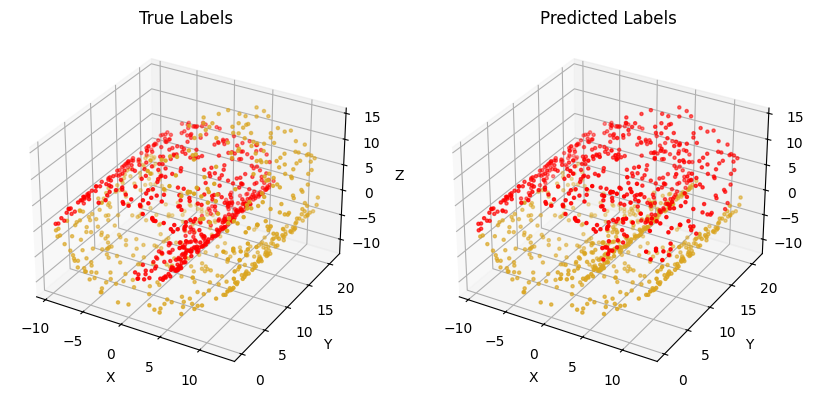

In [245]:
# 6. Plot the results from using GridSearchCV in (5).
from matplotlib.colors import ListedColormap

y_sw_pred = grid_search.predict(X_sw)

# Create 3D plots for the true and predicted labels
fig = plt.figure(figsize=(10, 8))
cmap = ListedColormap(['red', 'goldenrod'])

# Plot for true labels
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_sw[:, 0], X_sw[:, 1], X_sw[:, 2], c=y_sw_binary, cmap=cmap, s=5)
ax1.set_title('True Labels')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot for predicted labels
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_sw[:, 0], X_sw[:, 1], X_sw[:, 2], c=y_sw_pred, cmap=cmap, s=5)
ax2.set_title('Predicted Labels')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
plt.show()

In [246]:
# TODO: 7. Create a video discussing the code and result for each question.
#   Discuss challenges you confronted and solutions to overcoming them, if applicable.